# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [ ]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
X = boston.data
Y = boston.target

# 3. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X,Y,test_size = 0.3)

# 4. Simple Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
model.score(Xtrain, Ytrain)

0.7306922902786817

# 5. Ridge Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Ridge 
modelr = Ridge(alpha = 100)
modelr.fit(Xtrain,Ytrain)
modelr.score(Xtrain,Ytrain)

0.6959571537481506

In [ ]:
modelr.score(Xtrain,Ytrain)

0.6959571537481506

# 6. Lasso Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Lasso 
modelr = Lasso(alpha = 0.1)
modelr.fit(Xtrain,Ytrain)
modelr.score(Xtrain,Ytrain)

0.7130401046917472

# 7. Polynomial Regression of degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
xtrain_poly = pf.fit_transform(Xtrain)
xtest_poly = pf.fit_transform(Xtest)



In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(xtrain_poly,Ytrain)
lin_reg.score(xtrain_poly,Ytrain)


0.9365068319487002

# 8. Ridge Regularization for Polynomial model

In [ ]:
modelrlp = Ridge(alpha = 100)
modelrlp.fit(xtrain_poly,Ytrain)


Ridge(alpha=100)

In [ ]:
modelrlp.score(xtest_poly,Ytest)


0.7557177077761896

# 9. Lasso Regularization for Polynomial model

In [ ]:
modelrp = Lasso(alpha = 100)
modelrp.fit(xtrain_poly,Ytrain)


Lasso(alpha=100)

In [ ]:
modelrp.score(xtest_poly,Ytest)

0.7666563330664815

# 10. Select K Best

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func = f_regression,k =7)
x_selected = kb.fit_transform(Xtrain,Ytrain)
x_selected[0]

array([  2.77974,  19.58   ,   0.871  ,   4.903  , 403.     ,  14.7    ,
        29.29   ])

In [ ]:
columns = ['LSTAT','ZN','INDUS','TAX','PTRATIO']

In [ ]:
model = LinearRegression()
model.fit(x_selected,Ytrain)
model.score(x_selected,Ytrain)

0.6582836495088724

In [ ]:
x_selected = kb.fit_transform(Xtest,Ytest)
x_selected[0]

array([1.810e+01, 6.550e-01, 6.209e+00, 2.400e+01, 6.660e+02, 2.020e+01,
       1.322e+01])

In [ ]:
lrk = LinearRegression()
lrk.fit(x_selected,Ytest)
lrk.score(x_selected,Ytest)

0.8057285884963419

In [ ]:
tdf =pd.DataFrame(Xtest, columns = boston.feature_names)
tdf

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     7.83932   0.0  18.10   0.0  0.655  6.209   65.4  2.9634  24.0  666.0   
1     0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
2    11.16040   0.0  18.10   0.0  0.740  6.629   94.6  2.1247  24.0  666.0   
3     0.10290  30.0   4.93   0.0  0.428  6.358   52.9  7.0355   6.0  300.0   
4    73.53410   0.0  18.10   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
147   0.26838   0.0   9.69   0.0  0.585  5.794   70.6  2.8927   6.0  391.0   
148   0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
149  51.13580   0.0  18.10   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
150   0.01439  60.0   2.93   0.0  0.401  6.604   18.8  6.2196   1.0  265.0   
151   0.19073  22.0   5.86   0.0  0.431  6.718   17.5  7.8265   7.0  330.0   

     PTRATIO       B  LSTAT  
0       20.2  396.90  13.22  
1       20.1  390.11  18.07  
2       20.2  109.85  23.27  
3       16.6  372.75  11.22  
4       20.2   16.45  20.62  
..       ...     ...    ...  
147     19.2  396.90  14.10  
148     21.0  392.53  13.83  
149     20.2    2.60  10.11  
150     15.6  376.70   4.38  
151     19.1  393.74   6.56  

[152 rows x 13 columns]

In [ ]:
test_selected = tdf[columns]
test_selected.shape

(152, 5)

In [ ]:
model.score(test_selected, Ytest)

In [ ]:
traindf = pd.DataFrame(data = Xtrain,columns = boston.feature_names)
traindf['target'] = Ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  2.77974   0.0  19.58   0.0  0.871  4.903  97.8  1.3459  5.0  403.0   
1  0.17142   0.0   6.91   0.0  0.448  5.682  33.8  5.1004  3.0  233.0   
2  2.33099   0.0  19.58   0.0  0.871  5.186  93.8  1.5296  5.0  403.0   
3  0.08187   0.0   2.89   0.0  0.445  7.820  36.9  3.4952  2.0  276.0   
4  0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   

   PTRATIO       B  LSTAT  target  
0     14.7  396.90  29.29    11.8  
1     17.9  396.90  10.21    19.3  
2     14.7  356.99  28.32    17.8  
3     18.0  393.53   3.57    43.8  
4     15.2  395.60  12.43    22.9

In [ ]:
corr = traindf.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.194842  0.419330 -0.047074  0.421514 -0.228115  0.360913   
ZN      -0.194842  1.000000 -0.531686 -0.028274 -0.504562  0.338723 -0.561171   
INDUS    0.419330 -0.531686  1.000000  0.069213  0.760682 -0.422631  0.630653   
CHAS    -0.047074 -0.028274  0.069213  1.000000  0.084445  0.042664  0.081921   
NOX      0.421514 -0.504562  0.760682  0.084445  1.000000 -0.339297  0.731104   
RM      -0.228115  0.338723 -0.422631  0.042664 -0.339297  1.000000 -0.248557   
AGE      0.360913 -0.561171  0.630653  0.081921  0.731104 -0.248557  1.000000   
DIS     -0.391169  0.657141 -0.715647 -0.096479 -0.774936  0.237526 -0.744706   
RAD      0.624110 -0.307607  0.611353 -0.007792  0.596221 -0.235499  0.474436   
TAX      0.588363 -0.299736  0.732426 -0.031649  0.657628 -0.315318  0.515314   
PTRATIO  0.297838 -0.415972  0.390048 -0.118603  0.193726 -0.381080  0.271015   
B       -0.300183  0.171662 -0.375420  0.051763 -0.380376  0.161574 -0.278731   
LSTAT    0.465506 -0.393812  0.579070 -0.032122  0.569219 -0.633482  0.577973   
target  -0.361868  0.346408 -0.439114  0.179897 -0.401235  0.701133 -0.344641   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.391169  0.624110  0.588363  0.297838 -0.300183  0.465506 -0.361868  
ZN       0.657141 -0.307607 -0.299736 -0.415972  0.171662 -0.393812  0.346408  
INDUS   -0.715647  0.611353  0.732426  0.390048 -0.375420  0.579070 -0.439114  
CHAS    -0.096479 -0.007792 -0.031649 -0.118603  0.051763 -0.032122  0.179897  
NOX     -0.774936  0.596221  0.657628  0.193726 -0.380376  0.569219 -0.401235  
RM       0.237526 -0.235499 -0.315318 -0.381080  0.161574 -0.633482  0.701133  
AGE     -0.744706  0.474436  0.515314  0.271015 -0.278731  0.577973 -0.344641  
DIS      1.000000 -0.515047 -0.545585 -0.260365  0.300578 -0.472511  0.214438  
RAD     -0.515047  1.000000  0.915478  0.481860 -0.431835  0.460513 -0.329314  
TAX     -0.545585  0.915478  1.000000  0.463335 -0.439177  0.514391 -0.409058  
PTRATIO -0.260365  0.481860  0.463335  1.000000 -0.169182  0.354482 -0.478097  
B        0.300578 -0.431835 -0.439177 -0.169182  1.000000 -0.381955  0.321647  
LSTAT   -0.472511  0.460513  0.514391  0.354482 -0.381955  1.000000 -0.725776  
target   0.214438 -0.329314 -0.409058 -0.478097  0.321647 -0.725776  1.000000

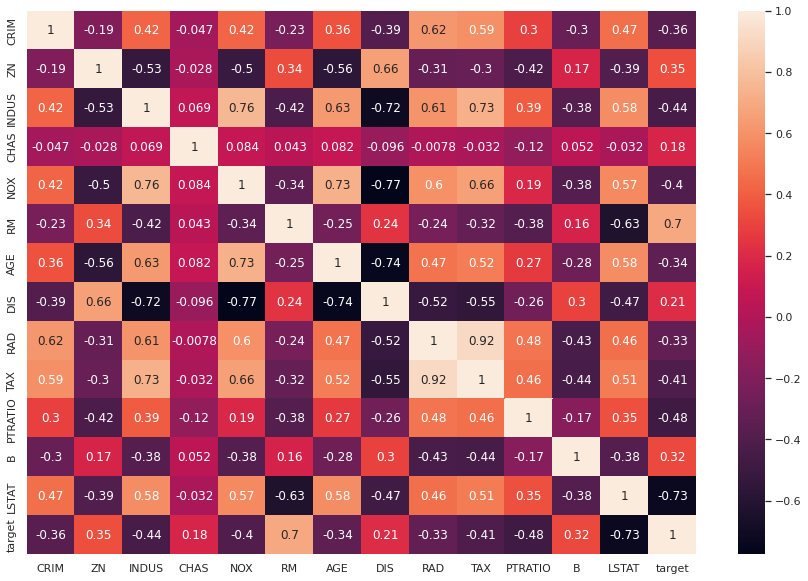

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot = True)
plt.show()

In [ ]:
selected_columns = ['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()


CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0   7.83932  18.10  0.655  6.209  666.0     20.2  13.22
1   0.10574  27.74  0.609  5.983  711.0     20.1  18.07
2  11.16040  18.10  0.740  6.629  666.0     20.2  23.27
3   0.10290   4.93  0.428  6.358  300.0     16.6  11.22
4  73.53410  18.10  0.679  5.957  666.0     20.2  20.62

In [ ]:
kmodel = LinearRegression()
kmodel.fit(train_selected,Ytrain)
kmodel.score(train_selected,Ytrain)

0.6582836495088724

In [ ]:
kmodel.fit(test_selected,Ytest)
kmodel.score(test_selected,Ytest)

0.7007394986966127

# 11. Conclusion

In order to remove the over fitting we do regularization


if we are going to use lasso we dont have to apply feature selection.
Compare lasso and feature selection score.

Why Regularization?
Regularization helps the model to generalize better so that it performs better with unseen data. Regularization introduces uncertainty or randomness to the learning algorithm, it also simplifies the neural network. Some of the regularization techniques penalize the weight metrics forIn order to reduce the problem of overfitting, we apply Regularization. Increasing the alpha may reduce the accuracy of train but increases the test accuracy or the difference between the train accuracy and test accuracy.The hyperparameter alpha controls how much you want to regularize the model. If alpha = 0 then Ridge Regression is just Linear Regression.